In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [116]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import gradio as gr
import seaborn as sns

In [117]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [118]:
print(f"Training Data: {X_train.shape[0]} instances")
print(f"Test Data: {X_test.shape[0]} instances")
print(f"Image Dimensions: {X_train.shape[1:]} (28x28 pixels)")

Training Data: 60000 instances
Test Data: 10000 instances
Image Dimensions: (28, 28) (28x28 pixels)


In [119]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train_f = X_train.reshape(len(X_train), 28*28)  # Flatten to 1D
X_test_f = X_test.reshape(len(X_test), 28*28)

In [120]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train_f, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8739 - loss: 0.4475 - val_accuracy: 0.9660 - val_loss: 0.1248
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9646 - loss: 0.1251 - val_accuracy: 0.9742 - val_loss: 0.0895
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9762 - loss: 0.0821 - val_accuracy: 0.9785 - val_loss: 0.0805
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0578 - val_accuracy: 0.9777 - val_loss: 0.0813
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 0.9770 - val_loss: 0.0818
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9795 - val_loss: 0.0777
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9924 - loss: 0.0261 - val_accuracy: 0.9805 - val_loss: 0.0752
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9940 - loss: 0.0208

In [122]:
test_loss, test_accuracy = model.evaluate(X_test_f, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9770 - loss: 0.0990
Test Accuracy: 0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


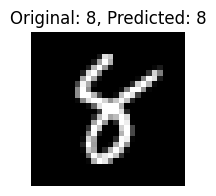

In [123]:
x = 5236  # Example test sample index
plt.figure(figsize=(2, 2))
plt.axis("off")
plt.imshow(X_test[x], cmap="gray")
plt.title(f"Original: {y_test[x]}, Predicted: {np.argmax(model.predict(X_test_f[x:x+1]))}")
plt.show()

In [124]:
y_predicted = np.argmax(model.predict(X_test_f), axis=1)
conf = tf.math.confusion_matrix(y_test, y_predicted)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


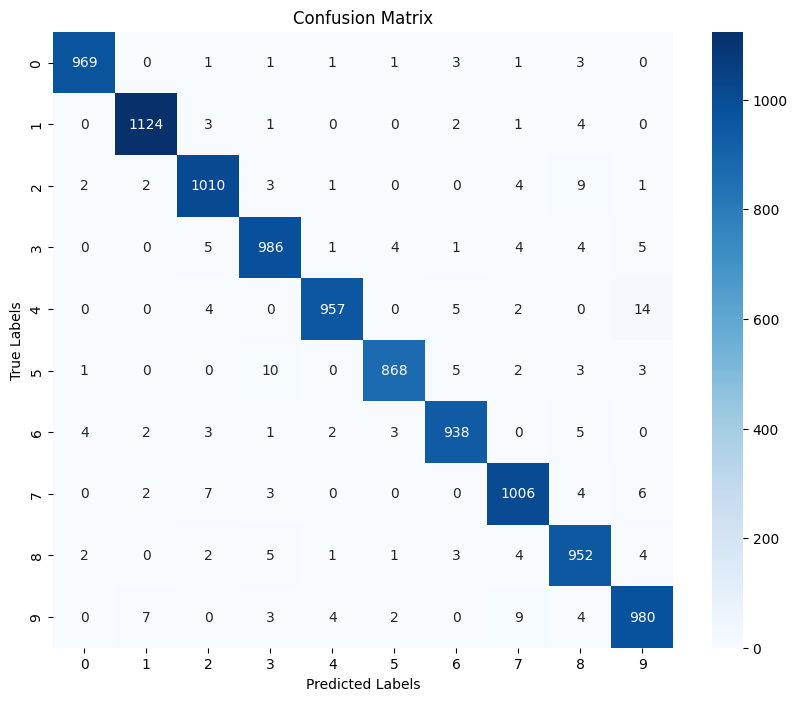

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [126]:
def predict_digit(data):
    image = data['composite']
    image = Image.fromarray(image).convert('L')
    grayscale_image = np.array(image)

    image = image.resize((28, 28))
    processed_image = np.array(image)

    image = np.array(image) / 255.0

    image = image.reshape(1, 28*28)
    prediction = model.predict(image)
    predicted_digit = int(np.argmax(prediction))
    return processed_image, predicted_digit

In [127]:
with gr.Interface(
    fn=predict_digit,
    inputs=gr.ImageEditor(
        sources=(),
        brush=gr.Brush(default_size=40, colors=["#FFFFFF"], default_color="#FFFFFF", color_mode="fixed"),
        height=512,
        width=512
    ),
    outputs=[gr.Image(label="Input to Model"), gr.Textbox(label="Predicted Digit")]
) as interface:
    interface.launch(debug=False)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://14e5c5702f685eef7f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
